In [18]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.dataload import JetNetDataLoader
from src.jetnet import JetNetFeatures
from ConfigCard import DataConfig as DataConfig

def Bins(xmin, xmax, bins=100):
    dx = (xmax - xmin) / bins
    return np.arange(xmin, xmax, dx)

In [2]:
data = JetNetDataLoader(dir_path='data/', 
                        data_files=DataConfig.sets,
                        num_jets=175000,
                        num_constituents=150, 
                        clip_neg_pt=True,
                        particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel']
                        )

print(data.get_data_info())

jetnet = JetNetFeatures(data[1])
flowmatch = JetNetFeatures(data[0])
diffusion = JetNetFeatures(data[2])

+-------------+-------------------+-----------+-------------------+------------------+
| Sample Name |     Filename      | Extension |        Key        |      Shape       |
+-------------+-------------------+-----------+-------------------+------------------+
| flow-match  | generated_data_FM |   .npy    |                   | (213536, 150, 3) |
|   jetnet    |       t150        |   .hdf5   | particle_features | (177945, 150, 4) |
|  diffusion  |     ddim_200      |    .h5    |   etaphipt_frac   | (266920, 146, 3) |
+-------------+-------------------+-----------+-------------------+------------------+
None


# Jet images

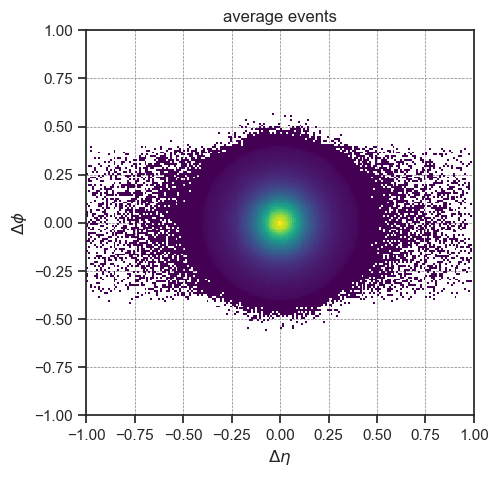

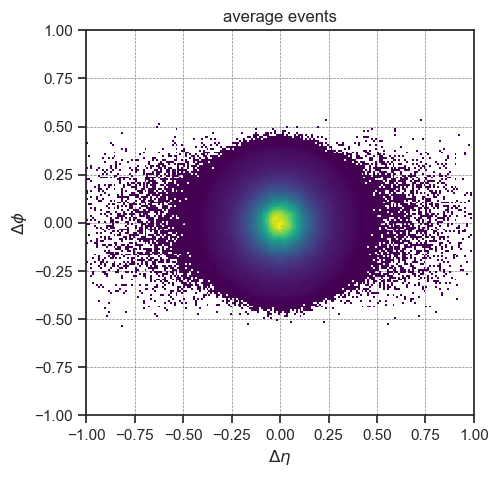

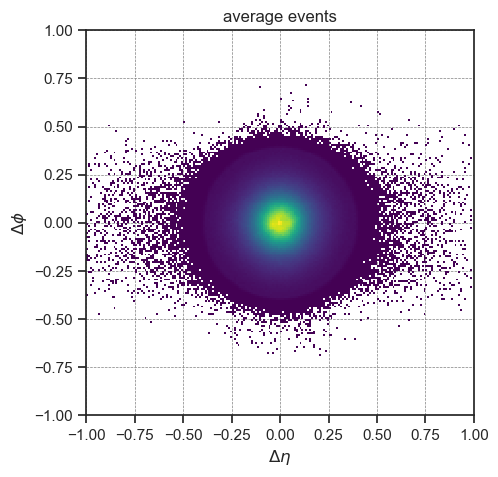

In [3]:
bins = (Bins(-1,1,200), Bins(-1,1,200))

jetnet.image(bins=bins) 
flowmatch.image(bins=bins)
diffusion.image(bins=bins)

# Check distribution of particle features

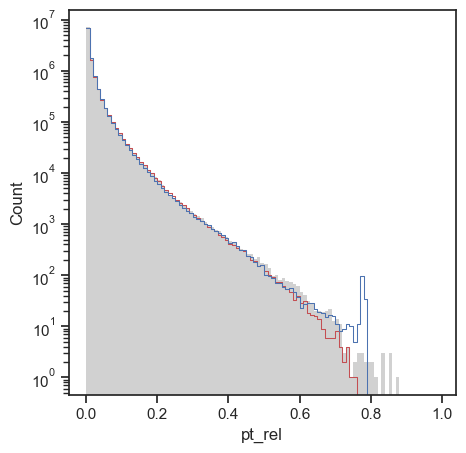

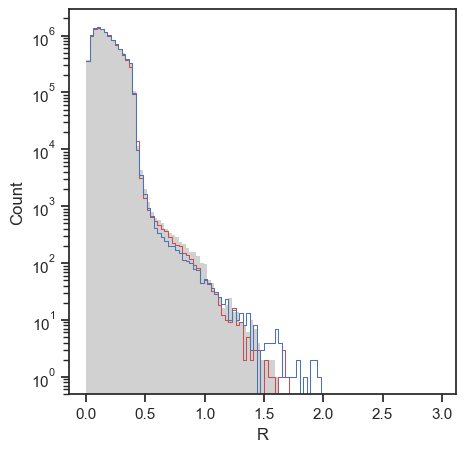

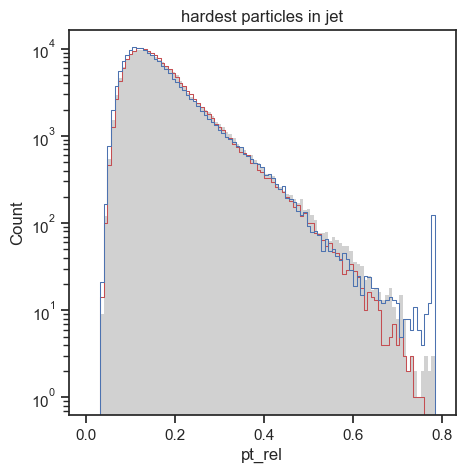

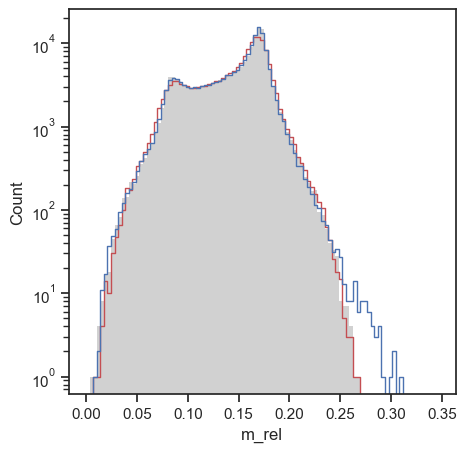

In [16]:

data = JetNetDataLoader(dir_path='data/', 
                        data_files=DataConfig.sets,
                        preprocess=None,
                        num_jets=175000,
                        num_constituents=150, 
                        clip_neg_pt=True,
                        particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel']
                        )

jetnet = JetNetFeatures(data[1])
flowmatch = JetNetFeatures(data[0])
diffusion = JetNetFeatures(data[2])

bins = Bins(0,1)
fig, ax = plt.subplots(1, figsize=(5,5))

jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
flowmatch.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

bins = Bins(0,3)
fig, ax = plt.subplots(1, figsize=(5,5))

jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
flowmatch.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=Bins(0,0.8), ax=ax) 
flowmatch.particle_plot(feature='pt_rel', nth_particle=1, bins=Bins(0,0.8), fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=Bins(0,0.8), fill=False, color='b', ax=ax) 
plt.title(r'hardest particles in jet')

bins = Bins(0,0.35)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.jet_plot(feature='m_rel', bins=bins, ax=ax) 
flowmatch.jet_plot(feature='m_rel', bins=bins,  fill=False, color='r', ax=ax) 
diffusion.jet_plot(feature='m_rel', bins=bins, fill=False, color='b', ax=ax) 

# Preprocess data

INFO: preprocessing jetnet
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0
INFO: preprocessing flow-match
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0
INFO: preprocessing diffusion
	- normalizing data
	- applying logit transform alpha=1e-05
	- standardizing data to zero-mean and std=1.0


Text(0.5, 1.0, 'hardest particles in jet')

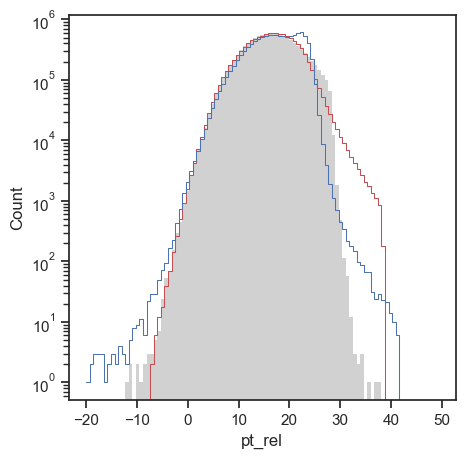

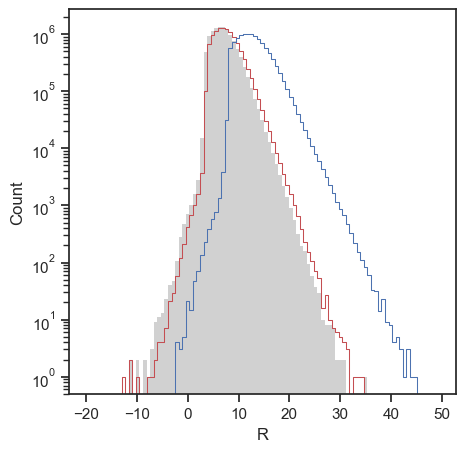

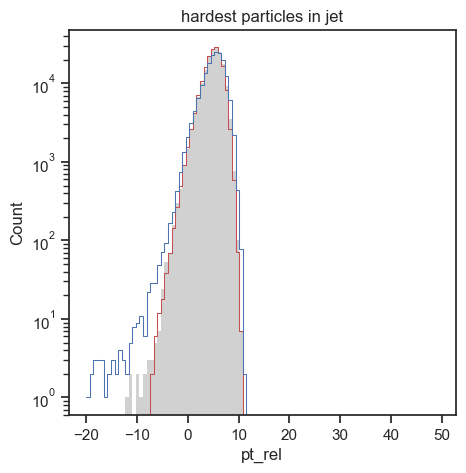

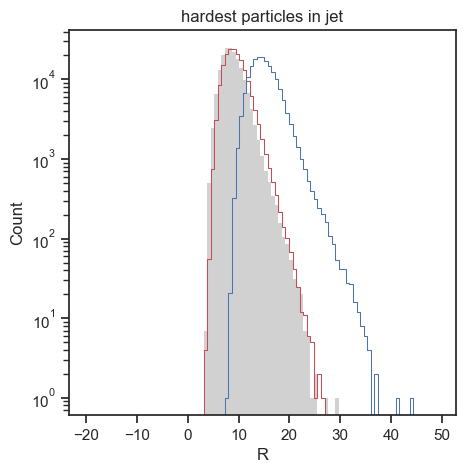

In [17]:
data = JetNetDataLoader(dir_path='data/',  data_files=DataConfig.sets, preprocess=DataConfig.preprocess, num_jets=175000, num_constituents=150,  clip_neg_pt=True, particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel'])

jetnet = JetNetFeatures(data[1])
flowmatch = JetNetFeatures(data[0])
diffusion = JetNetFeatures(data[2])

bins = Bins(-20,50)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
flowmatch.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

bins = Bins(-20,50)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
flowmatch.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

bins = Bins(-20,50)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, ax=ax) 
flowmatch.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
plt.title(r'hardest particles in jet')

bins = Bins(-20,50)
fig, ax = plt.subplots(1, figsize=(5,5))
jetnet.particle_plot(feature='R', nth_particle=1, bins=bins, ax=ax) 
flowmatch.particle_plot(feature='R', nth_particle=1, bins=bins, fill=False, color='r', ax=ax) 
diffusion.particle_plot(feature='R', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
plt.title(r'hardest particles in jet')
